# Problem 1: Clustering

# A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [2]:
bank_data=pd.read_csv("bank_marketing_part1_Data-1.csv")

In [3]:
bank_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


The dataset is loaded without any issues

In [4]:
bank_data.shape

(210, 7)

In [5]:
print("The dataset has ",bank_data.shape[0],"rows")
print("The dataset has ",bank_data.shape[1],"columns")

The dataset has  210 rows
The dataset has  7 columns


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


All the columns in the dataset has 210 non null values. All the variables are of float data type.

In [7]:
bank_data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no missing values in the dataset

In [8]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


1. The variable "spending" has a minimum value of 10.59 and a maximum value of 21.18.

   25th percentile value = 12.27
   
   50th percentile value = 14.355
   
   75th percentile value = 17.30
   
   Mean was found to be 14.8 and the standard deviation was found to be 2.909

2. The variable "advance_payments" has a minimum value of 12.41 and a maximum value of 17.25.

   25th percentile value = 13.45
   
   50th percentile value = 14.32
   
   75th percentile value = 15.715
   
   Mean was found to be 14.559 and the standard deviation was found to be 1.305

3. The variable "probability_of_full_payment" has a minimum value of 0.8081 and a maximum value of 0.9183.

   25th percentile value = 0.8569
   
   50th percentile value = 0.87345
   
   75th percentile value = 0.887775
   
   Mean was found to be 0.8709 and the standard deviation was found to be 0.0236

4. The variable "current_balance" has a minimum value of 4.899 and a maximum value of 6.675.

   25th percentile value = 5.26225
   
   50th percentile value = 5.5235
   
   75th percentile value = 5.97975
   
   Mean was found to be 5.628 and the standard deviation was found to be 0.443063

5. The variable "credit_limit" has a minimum value of 2.63 and a maximum value of 4.033.

   25th percentile value = 2.944
   
   50th percentile value = 3.237
   
   75th percentile value = 3.56175
   
   Mean was found to be 3.258605 and the standard deviation was found to be 0.377714

6. The variable "min_payment_amt" has a minimum value of 0.7651 and a maximum value of 8.456.

   25th percentile value = 2.5615
   
   50th percentile value = 3.599
   
   75th percentile value = 4.76875
   
   Mean was found to be 3.700201 and the standard deviation was found to be 1.503557

7. The variable "max_spent_in_single_shopping" has a minimum value of 4.519 and a maximum value of 6.55.

   25th percentile value = 5.045
   
   50th percentile value = 5.223
   
   75th percentile value = 5.877
   
   Mean was found to be 5.408071 and the standard deviation was found to be 0.491480

In [9]:
bank_data.duplicated().sum()

0

There are no duplicated records in the dataset

In [10]:
feature_list=bank_data.columns

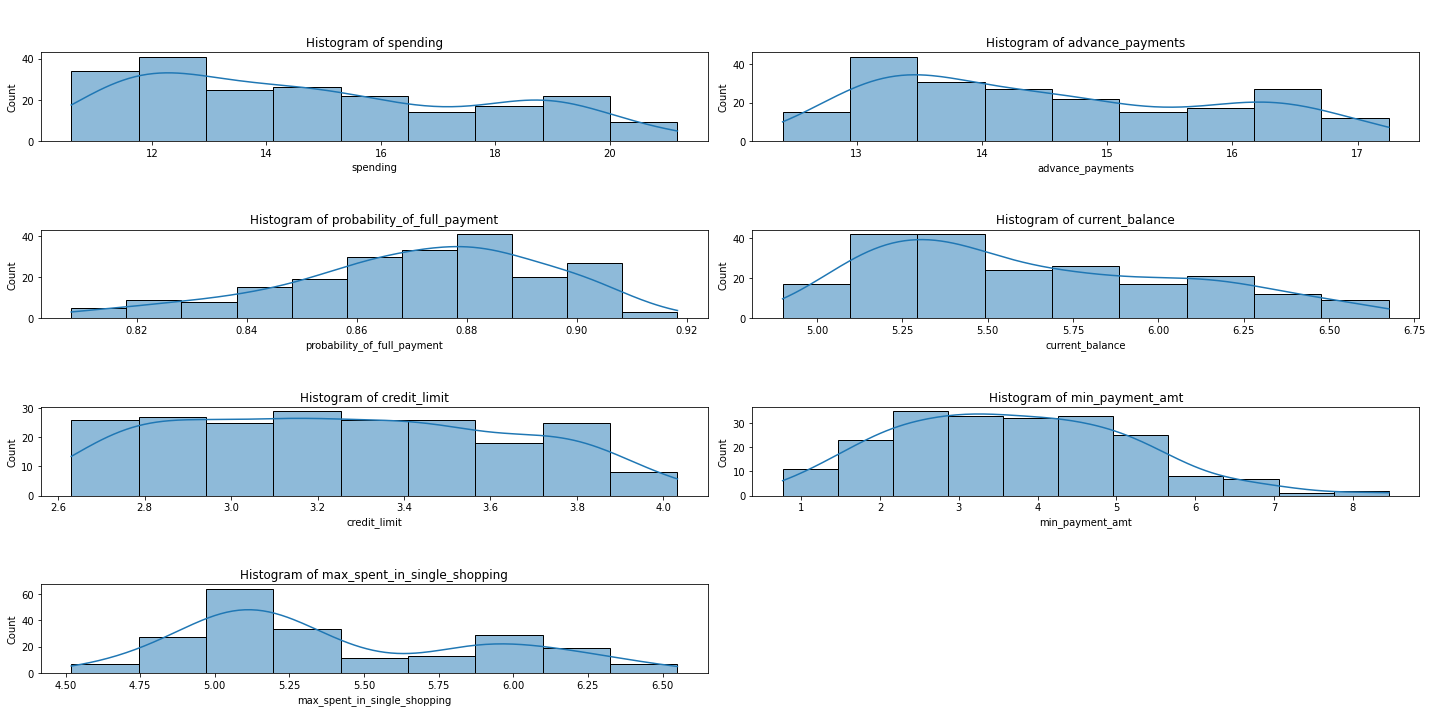

In [11]:
plt.figure(figsize=(20,10))
for i in range (len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.histplot(bank_data[feature_list[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list[i]))
    plt.tight_layout()

None of the variables are distributed normally.

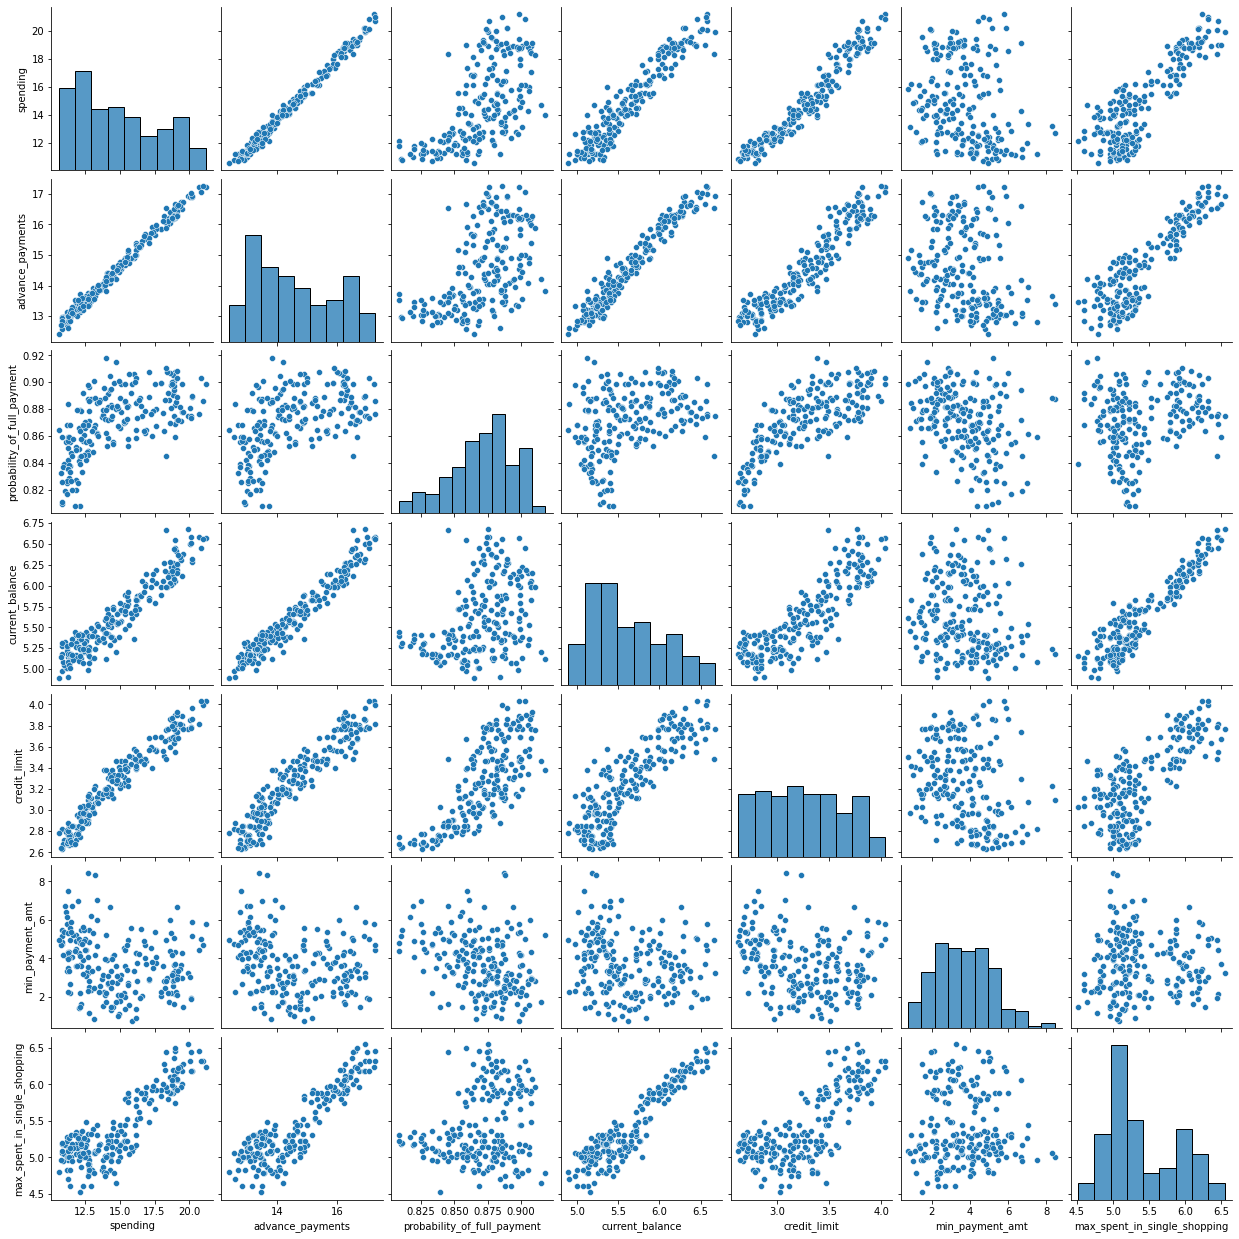

In [12]:
sns.pairplot(bank_data)

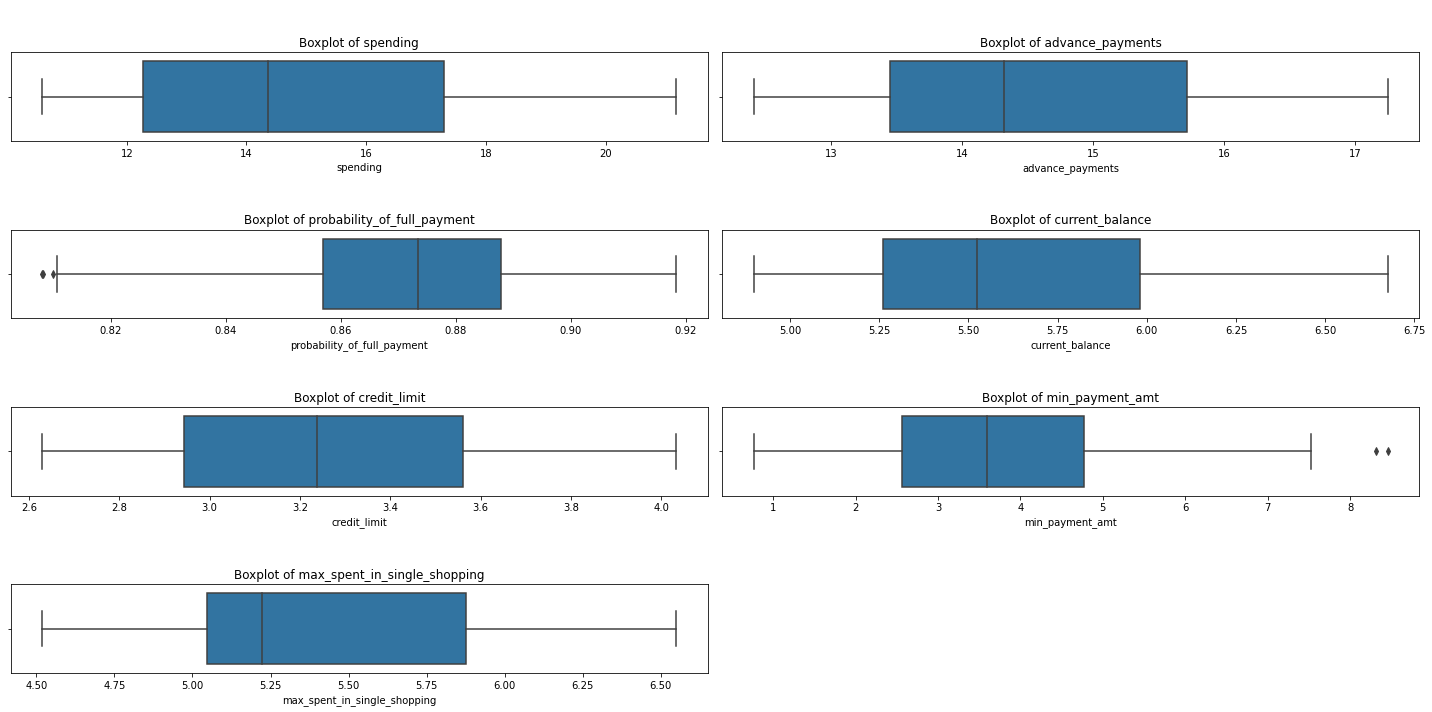

In [13]:
plt.figure(figsize=(20,10))
for i in range (len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(bank_data[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

We can see from the above boxplot that all the variables except **"probability of full payment" and Minimum Payment amount** do not have any outliers. But we need to treat the outliers in the variable **"probability of full payment"**, as clustering is affected by presence of outlierss.

In [14]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [15]:
for i in range (len(feature_list)):
    LL1,UL1=remove_outlier(bank_data[feature_list[i]])
    print("The percentage of outliers in",feature_list[i],"Upper is",round(bank_data[bank_data[feature_list[i]]>UL1][feature_list[i]].count()*100/len(bank_data)),"%")
    print("The percentage of outliers in",feature_list[i],"lower is",round(bank_data[bank_data[feature_list[i]]<LL1][feature_list[i]].count()*100/len(bank_data)),"%")

The percentage of outliers in spending Upper is 0 %
The percentage of outliers in spending lower is 0 %
The percentage of outliers in advance_payments Upper is 0 %
The percentage of outliers in advance_payments lower is 0 %
The percentage of outliers in probability_of_full_payment Upper is 0 %
The percentage of outliers in probability_of_full_payment lower is 1 %
The percentage of outliers in current_balance Upper is 0 %
The percentage of outliers in current_balance lower is 0 %
The percentage of outliers in credit_limit Upper is 0 %
The percentage of outliers in credit_limit lower is 0 %
The percentage of outliers in min_payment_amt Upper is 1 %
The percentage of outliers in min_payment_amt lower is 0 %
The percentage of outliers in max_spent_in_single_shopping Upper is 0 %
The percentage of outliers in max_spent_in_single_shopping lower is 0 %


In [16]:
LL,UL=remove_outlier(bank_data["probability_of_full_payment"])

In [17]:
print("The Lower limit of the column probability_of_full_payment is",LL)

The Lower limit of the column probability_of_full_payment is 0.8105875


In [18]:
bank_data[bank_data["probability_of_full_payment"]<LL]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
77,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310


From the above table, we can see the rows of data which go below the lower limit of **0.8105875** in the **probability_of_full_payment** variable. We can see that the values entered are very much closer to 0.81. So we can replace the outliers with the lower limit values.

In [19]:
LL1,UL1=remove_outlier(bank_data["min_payment_amt"])

In [20]:
print("The Upper limit of the column probability_of_full_payment is",UL1)

The Upper limit of the column probability_of_full_payment is 8.079625


In [21]:
bank_data[bank_data["min_payment_amt"]>UL1]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
5,12.7,13.41,0.8874,5.183,3.091,8.456,5.000
89,13.2,13.66,0.8883,5.236,3.232,8.315,5.056


From the above table, we can see the rows of data which go above the upper limit of **8.079625** in the **min_payment_amt** variable. We can see that the values entered are very much closer to 8.079625. So we can replace the outliers with the upper limit values.

In [22]:
bank_data["probability_of_full_payment"]=np.where(bank_data["probability_of_full_payment"]<LL,LL,bank_data["probability_of_full_payment"])
bank_data["min_payment_amt"]=np.where(bank_data["min_payment_amt"]>UL1,UL1,bank_data["min_payment_amt"])

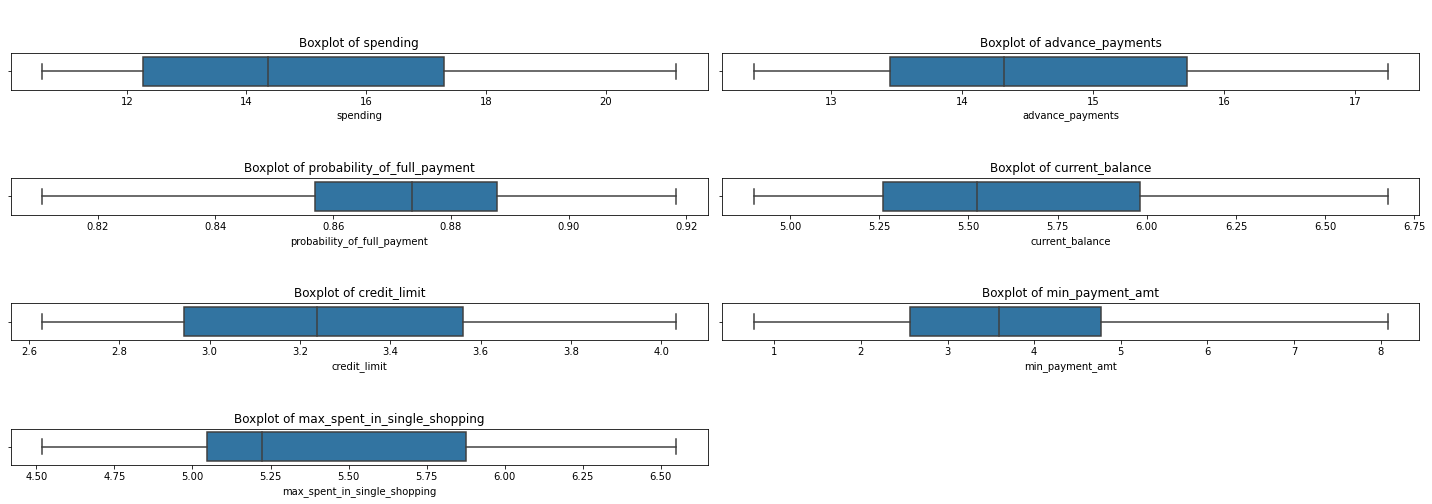

In [23]:
plt.figure(figsize=(20,7.1))
for i in range (len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(bank_data[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

<AxesSubplot:>

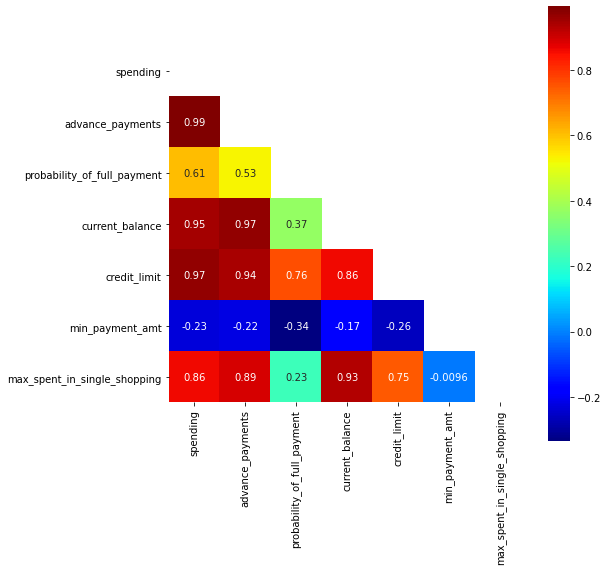

In [24]:
mask=np.triu(np.ones_like(bank_data.corr()))
plt.figure(figsize=(8,8))
sns.heatmap(bank_data.corr(),annot=True,cmap="jet",mask=mask,square=True)

**1.2  Do you think scaling is necessary for clustering in this case? Justify**

From the describe() function used on the dataset, it was found that each variable is in a different scale. We also could see the difference in their standard deviations and mean values for each of the variables. The minimum value of **mean** in the data is **0.87**, whereas the maximum value is **14.8**. Similarly the minimum value of **standard deviation** is **0236** and the maximum value is **2.909**

As we will be performing K-means clustering and Hierarchical clustering, which are distance based models, we need to perform scaling in order to make sure that the difference in scale does not affect the distance between two datapoints in the dataset.

In [25]:
# importing z score to perform scaling
from scipy.stats import zscore

In [26]:
bank_data_scaled=bank_data.apply(zscore)

In [27]:
bank_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


We can see that after performing scaling, the **mean** values for all the variables are closer to **0**, and the **standard deviation** values are close to **1**.

This scaled data will be used for clustering for better performance of the model.

**1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them**

In [28]:
#importing necessary libraries for performing hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster

In [29]:
link=linkage(bank_data_scaled,method="ward")

Here we have gone with the **wards linkage method** to form the linkages.

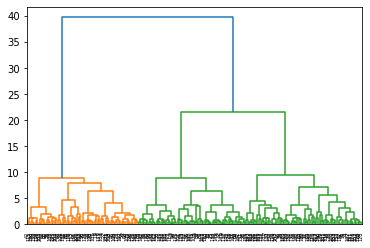

In [30]:
dend=dendrogram(link)

In order to make the dendrogram more understandable, a truncated dendrogram of the last 30 merge is plotted

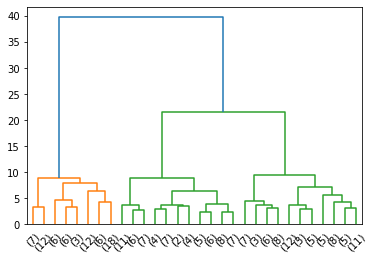

In [31]:
dend=dendrogram(link,truncate_mode="lastp",p=30)

The colour coding on the dendrogram says that we can go with 2 clusters. But from the dendrogram, the link which merges the last two green clusters have a good amount of distance between them. So we can go with 3 clusters.

In [32]:
clusters=fcluster(link,15,criterion="distance")

In [33]:
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

So, we have formed three clusters with the help of the dendrogram. Now we can add the clusters to the original dataset.

In [34]:
bank_data["Hier_Clusters"]=clusters

Let us look at each of the clusters 

In [35]:
bank_data.Hier_Clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: Hier_Clusters, dtype: int64

In [36]:
aggdata=bank_data.iloc[:,:8].groupby('Hier_Clusters').mean()
aggdata['Freq']=bank_data.Hier_Clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Hier_Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


**1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.**

In [37]:
#importing necessary libraries for performing K-Means clustering
from sklearn.cluster import KMeans

Let us now perform the K-means clustering for a range of clusters from 2 to 10, so that we can form the WSS plot, and select the ideal number of clusters.

In [38]:
WSS=[]

In [39]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(bank_data_scaled)
    WSS.append(km.inertia_)
WSS

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.86859623942047,
 327.00468785295186,
 289.369113380537,
 263.265794161753,
 240.26694591786404,
 221.01216921833273,
 206.32171600227784]

So now, that we have got the WSS (Within Sum of Squares) for each of the number of clusters, we proceed to plot the WSS plot.

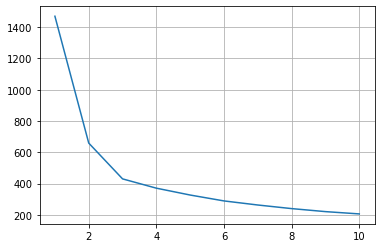

In [40]:
plt.plot(range(1,11),WSS)
plt.grid()
plt.show()

In [41]:
#Libraries required for calculating silhouette score, and silhouette width
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
Sil_Score=[]

In [43]:
for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(bank_data_scaled)
    labels=km.labels_
    Sil_Score.append(silhouette_score(bank_data_scaled,labels))
Sil_Score

[0.46560100442748986,
 0.4008059221522216,
 0.32783548276481167,
 0.28783798418478,
 0.28600848292929976,
 0.2738699784369071,
 0.25350575215774224,
 0.24992685036029824,
 0.2651384306876421]

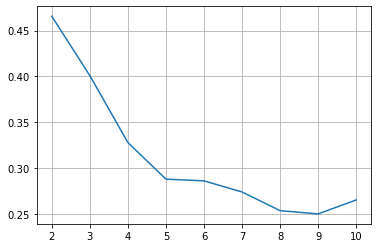

In [44]:
plt.plot(range(2,11),Sil_Score)
plt.grid()
plt.show()

From the above graph, we can see that the WSS value decreases sharply as we increase the number of clusters from 1 to 2. But then, we can also see that when we increase the number of clusters from 2 to 3, there is also a decline, but it is not that steep. But, we can clearly see that only after the number of clusters increases after 3, the curve gets flattened. Therefore, we can come to the conclusion that we can take **number of clusters = 3**

In [45]:
km=KMeans(n_clusters=3)
km.fit(bank_data_scaled)
labels=km.labels_

In [46]:
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [47]:
bank_data["K_Clusters"]=labels

Now let us drop the Hierarchical clusters that we added onto the dataset

In [48]:
bank_data.drop(["Hier_Clusters"],axis=1,inplace=True)

In [49]:
bank_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


Now, let us add the silhouette width for each of the clusters,and find the silhouette score for the model

In [50]:
silhouette_score(bank_data_scaled,labels)

0.4008059221522216

In [51]:
silhouette_samples(bank_data_scaled,labels).min()

0.0027685411286160638

In [52]:
sil_width=silhouette_samples(bank_data_scaled,labels)

In [53]:
bank_data["Sil_Width"]=sil_width

In [54]:
aggdata=bank_data.iloc[:,:8].groupby('K_Clusters').mean()
aggdata['Freq']=bank_data.K_Clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
K_Clusters,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


**1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.**

# Problem 2: CART-RF-ANN

# An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets

In [55]:
#importing required libraries for performing CART, RF, and ANN
from sklearn.tree import DecisionTreeClassifier # For Decision Tree Classification
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classification
from sklearn.neural_network import MLPClassifier # For ANN

**2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).**

In [56]:
#reading the data
insurance_df=pd.read_csv("insurance_part2_data-2.csv")

In [57]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [58]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


We have 6 object data type variables. We need to convert them into onteger data types, as our classification model does not work with categorical data

In [59]:
# Let us check for null values
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values in the dataset

In [60]:
# Let us look if we have duplicated rows.
insurance_df.duplicated().sum()

139

We can see that the dataset has 139 duplicates. But the dataset does not have any kind of unique identifier for a tourist. But as the ID was not given in the dataset, we can proceed to drop the duplicated rows.

In [61]:
insurance_df.drop_duplicates(inplace=True)

We have removed the duplicated rows in the dataset

In [62]:
insurance_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861.0,NaN,NaN,NaN,38.204124,10.678106,8.0,31.0,36.0,43.0,84.0
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861.0,NaN,NaN,NaN,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861.0,NaN,NaN,NaN,72.120238,135.9772,-1.0,12.0,28.0,66.0,4580.0
Sales,2861.0,NaN,NaN,NaN,61.757878,71.39974,0.0,20.0,33.5,69.3,539.0
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Duration has negative value, We need to impute the value as it could be an error. Similarly the maximum value is 4580, which is very large compared to other values. We need to impute it.

In [63]:
insurance_df["Duration"]=np.where(insurance_df["Duration"]<0,insurance_df["Duration"].median(),insurance_df["Duration"])

In [64]:
feature_list=["Age","Commision","Duration","Sales"]

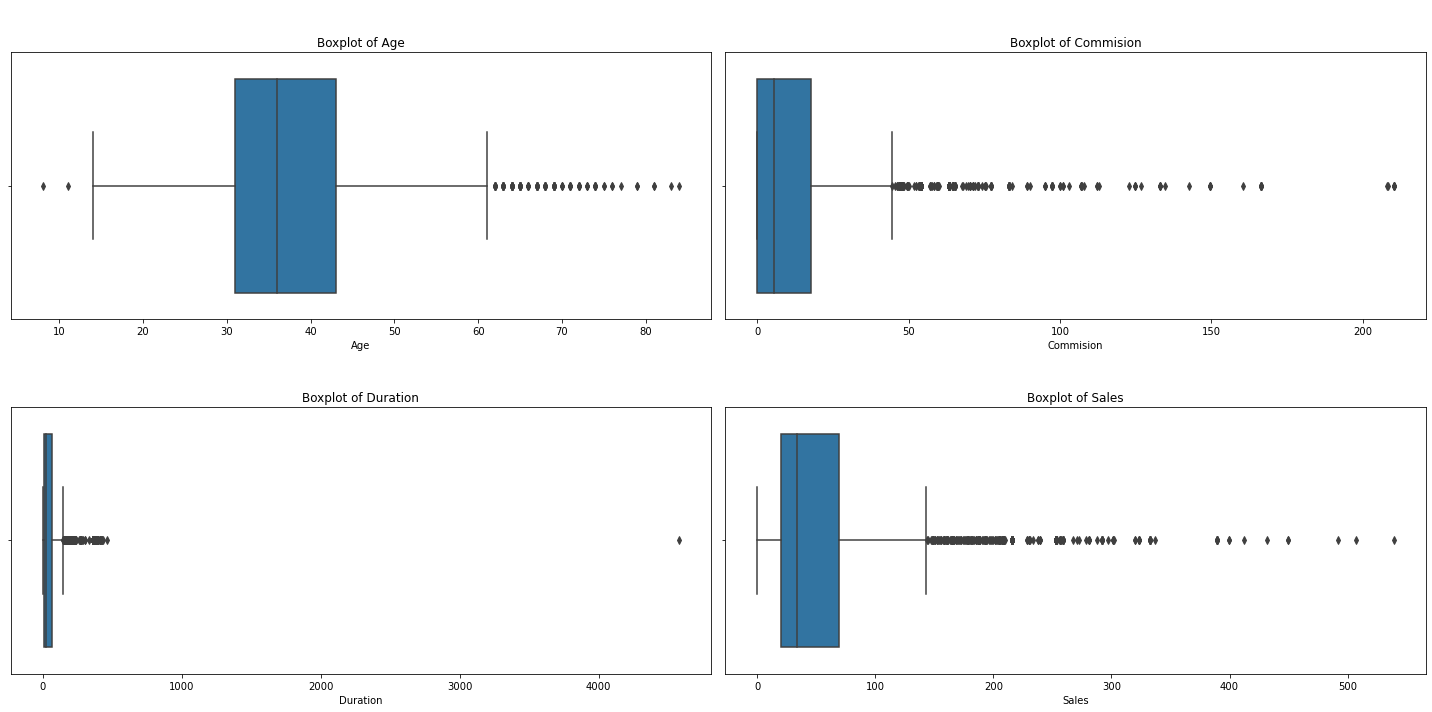

In [65]:
plt.figure(figsize=(20,10))
for i in range (len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(insurance_df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

As we can see all the four continuous variables have outliers. But these variables like Age, Commission and Sales may have a genuine case of outliers. But the duration has outliers where the duration croses 300 days for most of the outlier values. This is not entirely possible as the 300 days equate to almost 10 months. So we can impute those values alone.

In [66]:
for i in range (len(feature_list)):
    LL1,UL1=remove_outlier(insurance_df[feature_list[i]])
    print("The percentage of outliers in",feature_list[i],"Upper is",round(insurance_df[insurance_df[feature_list[i]]>UL1][feature_list[i]].count()*100/len(insurance_df)),"%")
    print("The percentage of outliers in",feature_list[i],"lower is",round(insurance_df[insurance_df[feature_list[i]]<LL1][feature_list[i]].count()*100/len(insurance_df)),"%")

The percentage of outliers in Age Upper is 4 %
The percentage of outliers in Age lower is 0 %
The percentage of outliers in Commision Upper is 12 %
The percentage of outliers in Commision lower is 0 %
The percentage of outliers in Duration Upper is 13 %
The percentage of outliers in Duration lower is 0 %
The percentage of outliers in Sales Upper is 12 %
The percentage of outliers in Sales lower is 0 %


In [67]:
LL,UL=remove_outlier(insurance_df["Duration"])
insurance_df["Duration"]=np.where(insurance_df["Duration"]>UL,UL,insurance_df["Duration"])

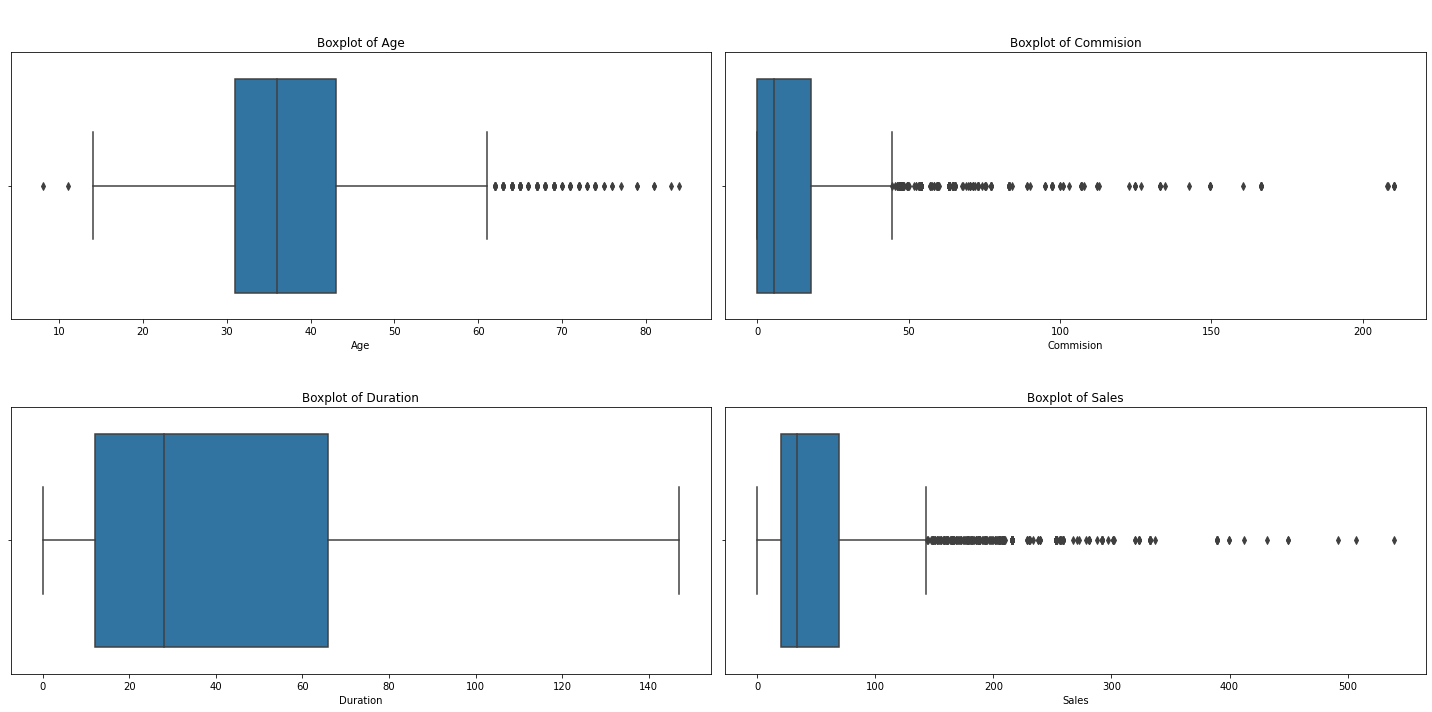

In [68]:
plt.figure(figsize=(20,10))
for i in range (len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.boxplot(insurance_df[feature_list[i]]);
    plt.title("\n\nBoxplot of {}".format(feature_list[i]))
    plt.tight_layout()

In [69]:
insurance_df["Sales"]=np.where(insurance_df["Sales"]==0,insurance_df["Sales"].median(),insurance_df["Sales"])

In [70]:
insurance_df[insurance_df["Commision"]>100]["Sales"].median()

256.2

In [71]:
insurance_df[insurance_df["Commision"]<100]["Sales"].median()

33.5

We can see that as the Sales increases, the commision also increases. So the values could be a genuine case. So we cannot remove the outliers from the Sales and Commision variables. Also we cannot remove the outliers from the age variables, as the maximum age is 84 in the dataset, which is possible.

Now we can see that the outliers have been removed for the duration column.

Although the decision tree and Random Forest models work even in the presence of outliers, the outliers were high. So it is best that we imputed them

In [72]:
insurance_df["Claimed"].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [73]:
insurance_df["Claimed"].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

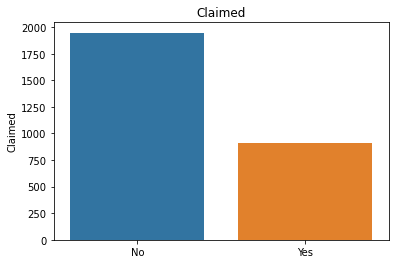

In [74]:
sns.barplot(x=insurance_df["Claimed"].unique(),y=insurance_df["Claimed"].value_counts())
plt.title("Claimed")
plt.show()

The number of people claiming is 914, whereas the number of people who have not claimed is 1947.

**The dataset is imbalanced. The number of people who have claimed is lesser than those who have not claimed insurance.** The number of people claiming insurance is only 31% of the dataset.

In [75]:
insurance_df["Agency_Code"].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

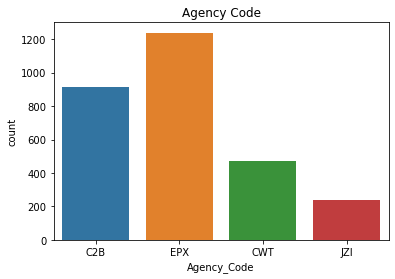

In [76]:
sns.countplot(x=insurance_df["Agency_Code"])
plt.title("Agency Code")
plt.show()

EPX agecny sells most of the insurance, followed by the C2B and CWT agencies. The JZI agency sells the least insurance

In [77]:
insurance_df["Type"].value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

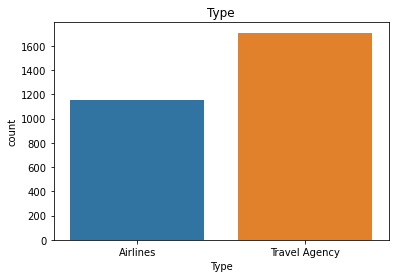

In [78]:
sns.countplot(x=insurance_df["Type"])
plt.title("Type")
plt.show()

Travel agencies sell more insurance compared to the airlines

In [79]:
insurance_df["Channel"].value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

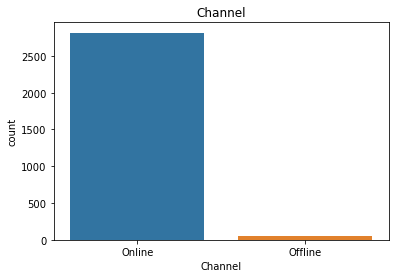

In [80]:
sns.countplot(x=insurance_df["Channel"])
plt.title("Channel")
plt.show()

Almost all of the insurance policies are bought online. Only a handful are bought through offline channel

In [81]:
insurance_df["Product Name"].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

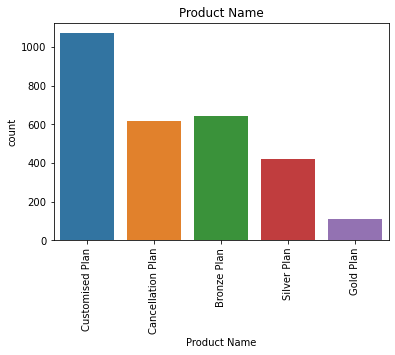

In [82]:
sns.countplot(x=insurance_df["Product Name"])
plt.title("Product Name")
plt.xticks(rotation=90)
plt.show()

The people prefer Customised Plans most, followed by Cancellation plan, Bronze plan, Silver plan and at last Gold Plan

In [83]:
insurance_df["Destination"].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

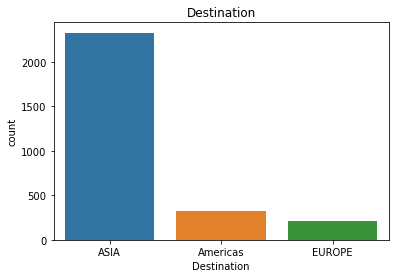

In [84]:
sns.countplot(x=insurance_df["Destination"])
plt.title("Destination")
plt.show()

Most of those who bought insurance travelled to ASIA the most, followed by America which is closely followed by Europe.

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

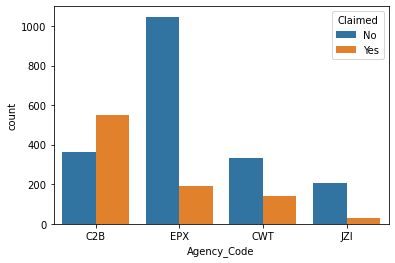

In [85]:
sns.countplot(insurance_df["Agency_Code"],hue=insurance_df["Claimed"])

We can see that EPX agency has very low claims compared to non claims. Similarly the agencies CWT and JZI have lesser claims than non claims. Only the agency C2B has more claims than non claims

<AxesSubplot:xlabel='Type', ylabel='count'>

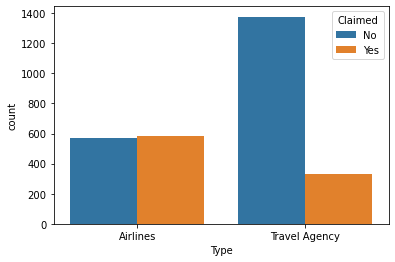

In [86]:
sns.countplot(insurance_df["Type"],hue=insurance_df["Claimed"])

The Airlines type has al most equal claims and non claims, whereas Travel Agency has more non claims than Claims.

<AxesSubplot:xlabel='Destination', ylabel='count'>

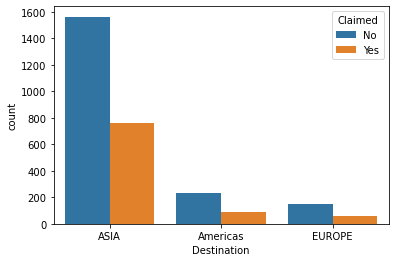

In [87]:
sns.countplot(insurance_df["Destination"],hue=insurance_df["Claimed"])

When seen with respect to Destination, all the non claims number are higher than the claimed number

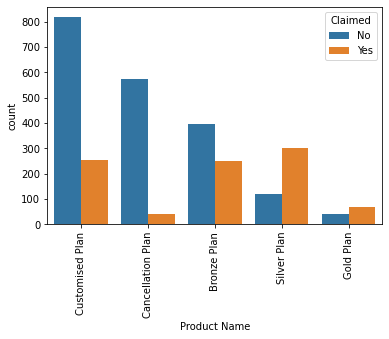

In [88]:
sns.countplot(insurance_df["Product Name"],hue=insurance_df["Claimed"])
plt.xticks(rotation=90)
plt.show()

The silver Plan and Gold Plan has more number of claims than number of non claims. The rest of the plans have lesser number of claims, and more number of non claims

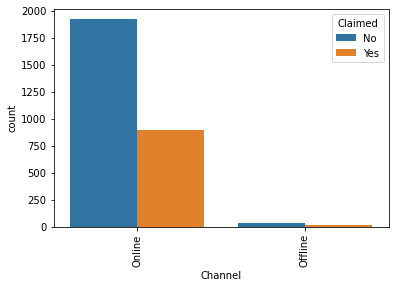

In [89]:
sns.countplot(insurance_df["Channel"],hue=insurance_df["Claimed"])
plt.xticks(rotation=90)
plt.show()

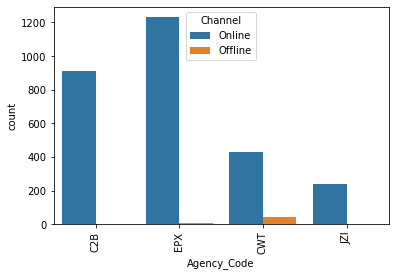

In [90]:
sns.countplot(insurance_df["Agency_Code"],hue=insurance_df["Channel"])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

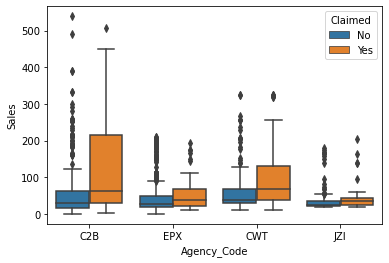

In [91]:
sns.boxplot(data = insurance_df, x="Agency_Code",y="Sales", hue="Claimed")

<AxesSubplot:xlabel='Type', ylabel='Sales'>

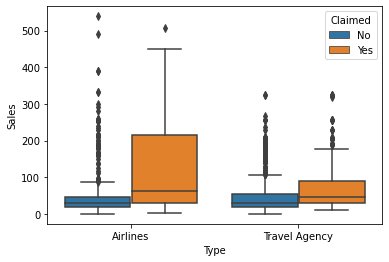

In [92]:
sns.boxplot(data = insurance_df, x="Type",y="Sales", hue="Claimed")

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

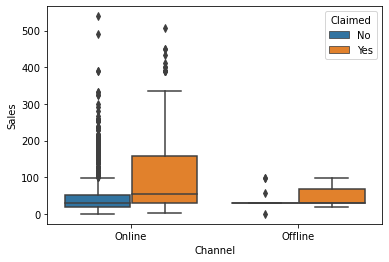

In [93]:
sns.boxplot(data = insurance_df, x="Channel",y="Sales", hue="Claimed")

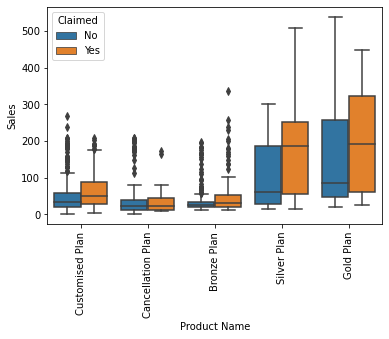

In [94]:
sns.boxplot(data = insurance_df, x="Product Name",y="Sales", hue="Claimed")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

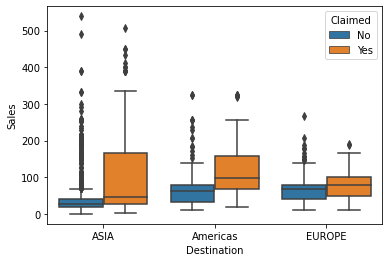

In [95]:
sns.boxplot(data = insurance_df, x="Destination",y="Sales", hue="Claimed")

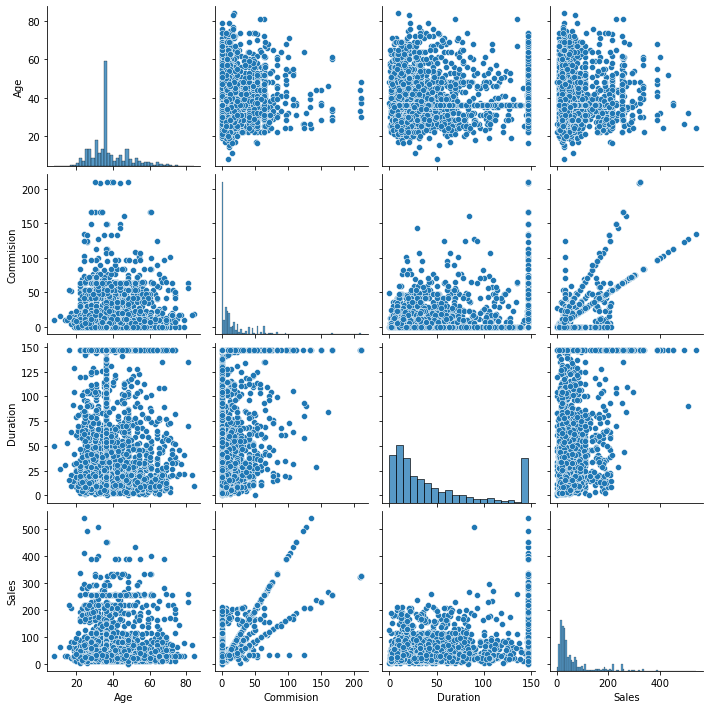

In [96]:
sns.pairplot(insurance_df)

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

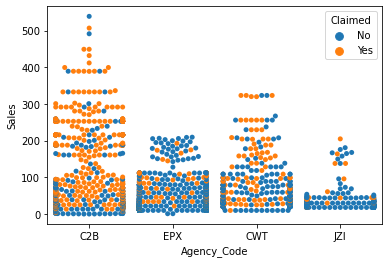

In [97]:
sns.swarmplot(data = insurance_df, x="Agency_Code",y="Sales",hue="Claimed")

<AxesSubplot:xlabel='Type', ylabel='Sales'>

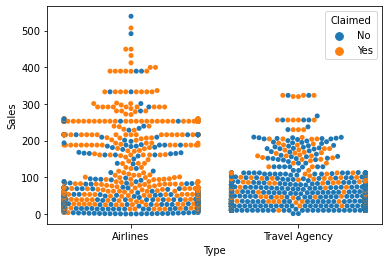

In [98]:
sns.swarmplot(data = insurance_df, x="Type",y="Sales",hue="Claimed")

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

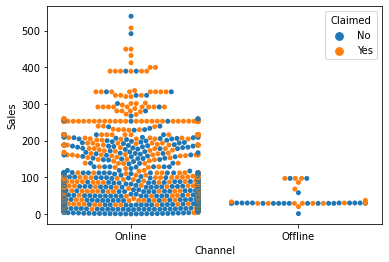

In [99]:
sns.swarmplot(data = insurance_df, x="Channel",y="Sales",hue="Claimed")

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

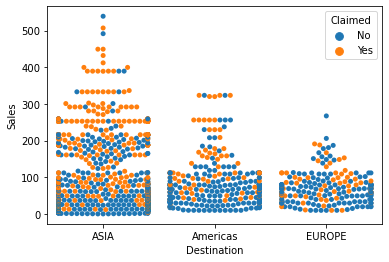

In [100]:
sns.swarmplot(data = insurance_df, x="Destination",y="Sales",hue="Claimed")

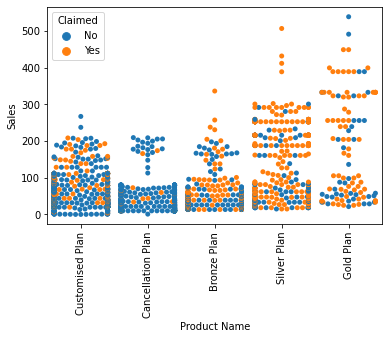

In [101]:
sns.swarmplot(data = insurance_df, x="Product Name",y="Sales",hue="Claimed")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

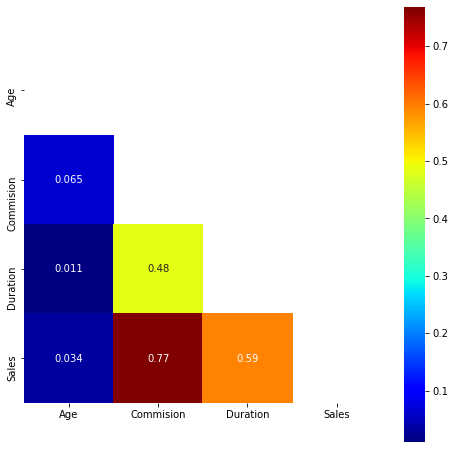

In [102]:
mask=np.triu(np.ones_like(insurance_df.corr()))
plt.figure(figsize=(8,8))
sns.heatmap(insurance_df.corr(),annot=True,cmap="jet",mask=mask,square=True)

In [103]:
feature_list=["Age","Commision","Duration","Sales"]

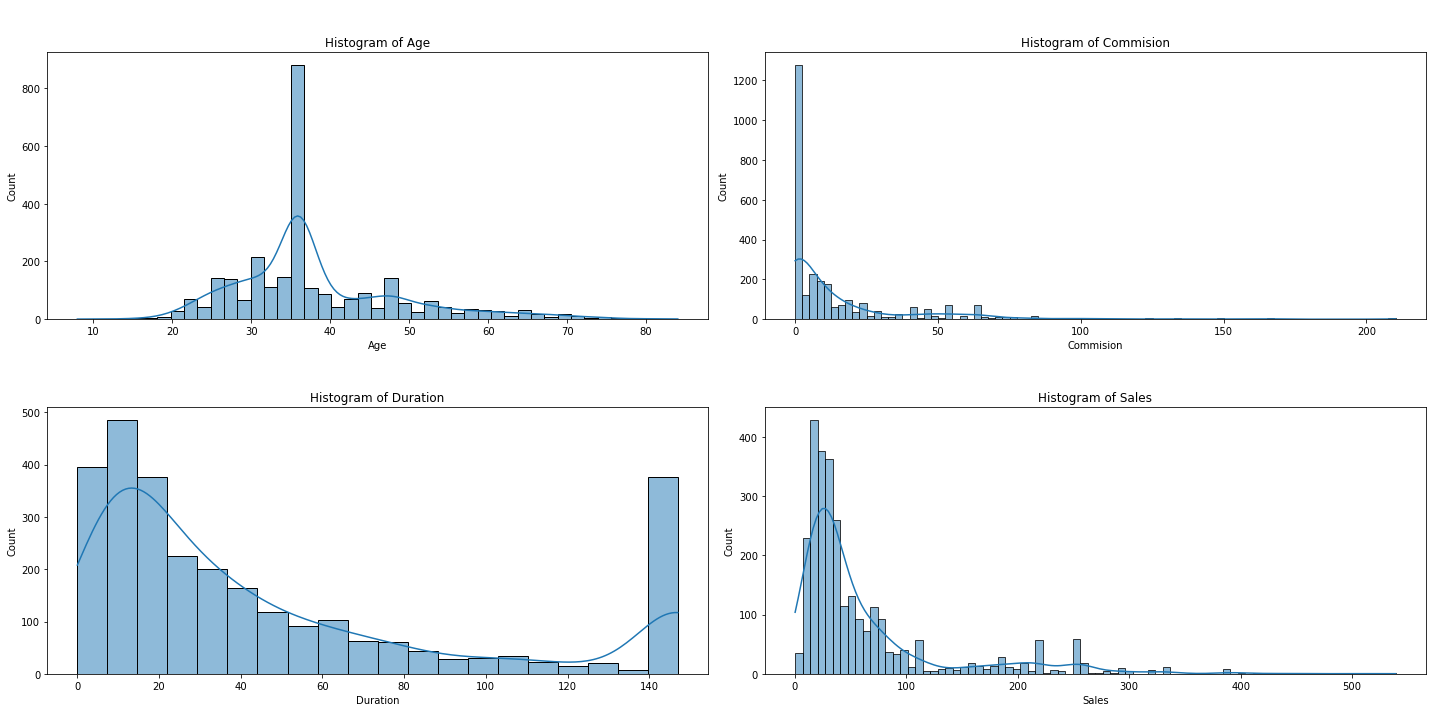

In [104]:
plt.figure(figsize=(20,10))
for i in range (len(feature_list)):
    plt.subplot(2,2,i+1)
    sns.histplot(insurance_df[feature_list[i]],kde=True);
    plt.title("\n\nHistogram of {}".format(feature_list[i]))
    plt.tight_layout()

The age column is normally distributed, and all the rest of the variables are reight skewed data.

**2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network**

In [105]:
#importing library for train test splitting
from sklearn.model_selection import train_test_split

In [106]:
# First we need to change the categorical data into continuous data
for feature in insurance_df.columns:
    if insurance_df[feature].dtype=="object":
        insurance_df[feature]=pd.Categorical(insurance_df[feature]).codes

In [107]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [108]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 193.1 KB


Now we can see that all the variables are transformed into continuous variables.

In [109]:
# Now let us drop the target column in X and add it in Y
x=insurance_df.drop("Claimed",axis=1)
y=insurance_df.pop("Claimed")

In [110]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0.00,1,34.0,20.00,2,0
2,39,1,1,5.94,1,3.0,9.90,2,1
3,36,2,1,0.00,1,4.0,26.00,1,0
4,33,3,0,6.30,1,53.0,18.00,0,0


In [111]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [112]:
#Now let us perform the train and test split
x_train,x_test,train_labels,test_labels=train_test_split(x,y,test_size=0.30,random_state=5)

In [113]:
x_train.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
336,36,2,1,0.00,1,40.0,74.0,2,1
2346,36,2,1,0.00,1,147.0,13.0,1,0
2014,63,3,0,6.30,1,7.0,18.0,0,0
1990,31,1,1,17.82,1,18.0,29.7,2,0
611,26,0,0,9.75,1,145.0,39.0,0,0


In [114]:
x_test.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
2093,27,0,0,18.56,1,16.0,74.25,4,0
396,30,0,0,6.13,1,18.0,24.50,4,0
1498,31,2,1,0.00,1,39.0,10.00,1,0
1635,61,0,0,22.13,1,74.0,88.50,4,0
1081,42,0,0,54.00,1,147.0,216.00,4,0


**Decision Tree Model**

In [115]:
# Decision Tree Model Creation
dt_model=DecisionTreeClassifier(criterion="gini")

In [116]:
#Fitting the training data in the model
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [117]:
#importing tree to visualizr the model to figure out best parameters
from sklearn import tree

In [118]:
train_char_labels=["No","Yes"]
Insurance_Tree_File=open("insurance tree.dot","w")
dot_data=tree.export_graphviz(dt_model,out_file=Insurance_Tree_File,feature_names=list(x_train),
                              class_names=list(train_char_labels))
Insurance_Tree_File.close()

In [119]:
#importing grid search cross validation
from sklearn.model_selection import GridSearchCV

In [120]:
#Giving parameter grid for using GridSearchCV
param_grid={
    "max_depth":[4.80,4.85,4.90,4.95,5],
    "min_samples_leaf":[42,43,44,45,46],
    "min_samples_split":[240,250,260,270]
}

In [121]:
dt_model=DecisionTreeClassifier(criterion="gini",random_state=1)

In [122]:
#Using Grid Search in model
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=10)

In [123]:
#Fitting the training set to the GridSearchCV
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [4.8, 4.85, 4.9, 4.95, 5],
                         'min_samples_leaf': [42, 43, 44, 45, 46],
                         'min_samples_split': [240, 250, 260, 270]})

In [124]:
#Finding out best parameters
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 42, 'min_samples_split': 260}

In [125]:
best_grid_dt=grid_search.best_estimator_

In [126]:
print (pd.DataFrame(best_grid_dt.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.612964
Sales         0.228117
Product Name  0.086027
Age           0.030637
Duration      0.026239
Commision     0.016015
Type          0.000000
Channel       0.000000
Destination   0.000000


In [127]:
ytrain_predict_dt=best_grid_dt.predict(x_train)
ytest_predict_dt=best_grid_dt.predict(x_test)

**Random Forest Model**

In [128]:
#initializing random forest classifier
rfcl=RandomForestClassifier(criterion="gini",random_state=1)

In [129]:
#selecting parameters for GridSearchCV
param_grid={
    "max_depth":[4,5,6],
    "max_features":[2,3,4],
    "min_samples_leaf":[8,9],
    "min_samples_split":[45,50],
    "n_estimators":[350,360]
}

In [130]:
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=5)

In [131]:
grid_search.fit(x_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [8, 9],
                         'min_samples_split': [45, 50],
                         'n_estimators': [350, 360]})

In [132]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 45,
 'n_estimators': 350}

In [133]:
best_grid_rfcl=grid_search.best_estimator_

In [134]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.310801
Product Name  0.236383
Sales         0.171145
Commision     0.107866
Duration      0.068612
Age           0.054112
Type          0.040272
Destination   0.008980
Channel       0.001828


In [135]:
ytrain_predict_rfcl=best_grid_rfcl.predict(x_train)
ytest_predict_rfcl=best_grid_rfcl.predict(x_test)

**ANN Model**

In [136]:
#To perform ANN, it is required for the data to be scaled
from sklearn.preprocessing import StandardScaler

In [137]:
sc=StandardScaler()

In [138]:
#Scaling the Train and test data
x_trains=sc.fit_transform(x_train)
x_tests=sc.transform(x_test)

In [139]:
#selecting parameters for GridSearchCV
param_grid={
    "hidden_layer_sizes":[150,200],
    "activation":["tanh","relu","logistic"],
    "solver":["sgd","adam"],
    "tol":[0.01],
    "max_iter":[2500,5000]
}

In [140]:
#Initializing MLP Classifier model
mlp=MLPClassifier(random_state=1,verbose=True)

In [141]:
grid_search=GridSearchCV(estimator=mlp,param_grid=param_grid,cv=5)

In [142]:
grid_search.fit(x_trains,train_labels)

Iteration 1, loss = 0.73069788
Iteration 2, loss = 0.68962436
Iteration 3, loss = 0.64770181
Iteration 4, loss = 0.61358046
Iteration 5, loss = 0.58753380
Iteration 6, loss = 0.56974268
Iteration 7, loss = 0.55683213
Iteration 8, loss = 0.54761962
Iteration 9, loss = 0.54218499
Iteration 10, loss = 0.53828026
Iteration 11, loss = 0.53512752
Iteration 12, loss = 0.53225852
Iteration 13, loss = 0.52976124
Iteration 14, loss = 0.52811738
Iteration 15, loss = 0.52675538
Iteration 16, loss = 0.52633422
Iteration 17, loss = 0.52685435
Iteration 18, loss = 0.52686407
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73298677
Iteration 2, loss = 0.69095052
Iteration 3, loss = 0.64714628
Iteration 4, loss = 0.61109580
Iteration 5, loss = 0.58386231
Iteration 6, loss = 0.56489994
Iteration 7, loss = 0.55089680
Iteration 8, loss = 0.54103446
Iteration 9, loss = 0.53502413
Iteration 10, loss = 0.53088456
Iteration 11, loss = 0.52718550


Iteration 12, loss = 0.53164986
Iteration 13, loss = 0.53057452
Iteration 14, loss = 0.52980692
Iteration 15, loss = 0.52855795
Iteration 16, loss = 0.52720290
Iteration 17, loss = 0.52642001
Iteration 18, loss = 0.52697981
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73012101
Iteration 2, loss = 0.69030325
Iteration 3, loss = 0.64506550
Iteration 4, loss = 0.60887739
Iteration 5, loss = 0.58679111
Iteration 6, loss = 0.57048266
Iteration 7, loss = 0.55798929
Iteration 8, loss = 0.54891127
Iteration 9, loss = 0.54215244
Iteration 10, loss = 0.53679075
Iteration 11, loss = 0.53278096
Iteration 12, loss = 0.53032280
Iteration 13, loss = 0.53015460
Iteration 14, loss = 0.52984657
Iteration 15, loss = 0.52940993
Iteration 16, loss = 0.52831008
Iteration 17, loss = 0.52733200
Iteration 18, loss = 0.52669653
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.6732382

Iteration 6, loss = 0.52015093
Iteration 7, loss = 0.51904013
Iteration 8, loss = 0.51765500
Iteration 9, loss = 0.51702973
Iteration 10, loss = 0.51538614
Iteration 11, loss = 0.51681992
Iteration 12, loss = 0.51651981
Iteration 13, loss = 0.51500565
Iteration 14, loss = 0.51480645
Iteration 15, loss = 0.51973081
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.60912166
Iteration 2, loss = 0.55518699
Iteration 3, loss = 0.53850352
Iteration 4, loss = 0.52776564
Iteration 5, loss = 0.52055485
Iteration 6, loss = 0.52000878
Iteration 7, loss = 0.52207194
Iteration 8, loss = 0.52013799
Iteration 9, loss = 0.51736855
Iteration 10, loss = 0.51747772
Iteration 11, loss = 0.51658328
Iteration 12, loss = 0.51463413
Iteration 13, loss = 0.51341392
Iteration 14, loss = 0.51425861
Iteration 15, loss = 0.52119012
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.65000694
It

Iteration 7, loss = 0.60355922
Iteration 8, loss = 0.59198323
Iteration 9, loss = 0.58224219
Iteration 10, loss = 0.57414988
Iteration 11, loss = 0.56714133
Iteration 12, loss = 0.56201487
Iteration 13, loss = 0.55855784
Iteration 14, loss = 0.55560215
Iteration 15, loss = 0.55219000
Iteration 16, loss = 0.54908338
Iteration 17, loss = 0.54682652
Iteration 18, loss = 0.54496572
Iteration 19, loss = 0.54247455
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70832792
Iteration 2, loss = 0.68978705
Iteration 3, loss = 0.66712336
Iteration 4, loss = 0.64521650
Iteration 5, loss = 0.62822980
Iteration 6, loss = 0.61373097
Iteration 7, loss = 0.60075121
Iteration 8, loss = 0.58975429
Iteration 9, loss = 0.58062391
Iteration 10, loss = 0.57285492
Iteration 11, loss = 0.56604920
Iteration 12, loss = 0.56099397
Iteration 13, loss = 0.55756962
Iteration 14, loss = 0.55467497
Iteration 15, loss = 0.55152882
Iteration 16, loss = 0.548

Iteration 8, loss = 0.51920053
Iteration 9, loss = 0.51865328
Iteration 10, loss = 0.51772349
Iteration 11, loss = 0.51662252
Iteration 12, loss = 0.51527649
Iteration 13, loss = 0.51376544
Iteration 14, loss = 0.51162630
Iteration 15, loss = 0.51053518
Iteration 16, loss = 0.50922519
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67410467
Iteration 2, loss = 0.59605331
Iteration 3, loss = 0.55507059
Iteration 4, loss = 0.53494800
Iteration 5, loss = 0.52271957
Iteration 6, loss = 0.51623870
Iteration 7, loss = 0.51189634
Iteration 8, loss = 0.50928848
Iteration 9, loss = 0.50850103
Iteration 10, loss = 0.50749780
Iteration 11, loss = 0.50610528
Iteration 12, loss = 0.50449036
Iteration 13, loss = 0.50281711
Iteration 14, loss = 0.50000940
Iteration 15, loss = 0.49956129
Iteration 16, loss = 0.49992165
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67324680


Iteration 3, loss = 0.62808774
Iteration 4, loss = 0.61683234
Iteration 5, loss = 0.60764663
Iteration 6, loss = 0.59889452
Iteration 7, loss = 0.59080711
Iteration 8, loss = 0.58544495
Iteration 9, loss = 0.58030699
Iteration 10, loss = 0.57506714
Iteration 11, loss = 0.57004953
Iteration 12, loss = 0.56456406
Iteration 13, loss = 0.55993514
Iteration 14, loss = 0.55572174
Iteration 15, loss = 0.55213688
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.64454808
Iteration 2, loss = 0.63560529
Iteration 3, loss = 0.62315681
Iteration 4, loss = 0.61140110
Iteration 5, loss = 0.60176536
Iteration 6, loss = 0.59269819
Iteration 7, loss = 0.58413265
Iteration 8, loss = 0.57839646
Iteration 9, loss = 0.57300131
Iteration 10, loss = 0.56741676
Iteration 11, loss = 0.56203019
Iteration 12, loss = 0.55646091
Iteration 13, loss = 0.55163761
Iteration 14, loss = 0.54711044
Iteration 15, loss = 0.54330993
Training loss did not improve 

Iteration 4, loss = 0.60004672
Iteration 5, loss = 0.58502435
Iteration 6, loss = 0.57310921
Iteration 7, loss = 0.56380720
Iteration 8, loss = 0.55771808
Iteration 9, loss = 0.55450530
Iteration 10, loss = 0.54712314
Iteration 11, loss = 0.54360423
Iteration 12, loss = 0.53932144
Iteration 13, loss = 0.53739789
Iteration 14, loss = 0.53393754
Iteration 15, loss = 0.53263478
Iteration 16, loss = 0.53410633
Iteration 17, loss = 0.53268796
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.67928914
Iteration 2, loss = 0.61475665
Iteration 3, loss = 0.60715600
Iteration 4, loss = 0.59819231
Iteration 5, loss = 0.58271170
Iteration 6, loss = 0.56995540
Iteration 7, loss = 0.56032900
Iteration 8, loss = 0.55365155
Iteration 9, loss = 0.54966983
Iteration 10, loss = 0.54270823
Iteration 11, loss = 0.53822498
Iteration 12, loss = 0.53340806
Iteration 13, loss = 0.53161995
Iteration 14, loss = 0.52836561
Iteration 15, loss = 0.528448

Iteration 16, loss = 0.53704727
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62835071
Iteration 2, loss = 0.62856124
Iteration 3, loss = 0.62924181
Iteration 4, loss = 0.63026923
Iteration 5, loss = 0.62552248
Iteration 6, loss = 0.62544953
Iteration 7, loss = 0.62699345
Iteration 8, loss = 0.63257989
Iteration 9, loss = 0.62544869
Iteration 10, loss = 0.62218829
Iteration 11, loss = 0.62578509
Iteration 12, loss = 0.61987503
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62806478
Iteration 2, loss = 0.62832618
Iteration 3, loss = 0.62910003
Iteration 4, loss = 0.62973039
Iteration 5, loss = 0.62592333
Iteration 6, loss = 0.62504568
Iteration 7, loss = 0.62568734
Iteration 8, loss = 0.63189718
Iteration 9, loss = 0.62502408
Iteration 10, loss = 0.62149694
Iteration 11, loss = 0.62477430
Iteration 12, loss = 0.61983519
Training loss did not improve more tha

Iteration 13, loss = 0.53614089
Iteration 14, loss = 0.53356314
Iteration 15, loss = 0.53279387
Iteration 16, loss = 0.53107677
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62191591
Iteration 2, loss = 0.60697172
Iteration 3, loss = 0.59562685
Iteration 4, loss = 0.58294454
Iteration 5, loss = 0.57195895
Iteration 6, loss = 0.56587996
Iteration 7, loss = 0.55737948
Iteration 8, loss = 0.55894028
Iteration 9, loss = 0.54989652
Iteration 10, loss = 0.54202760
Iteration 11, loss = 0.54233088
Iteration 12, loss = 0.53399997
Iteration 13, loss = 0.52927970
Iteration 14, loss = 0.52615196
Iteration 15, loss = 0.52542929
Iteration 16, loss = 0.52482035
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62131728
Iteration 2, loss = 0.60782630
Iteration 3, loss = 0.59435917
Iteration 4, loss = 0.58054904
Iteration 5, loss = 0.57202544
Iteration 6, loss = 0.56379592
Ite

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1, verbose=True),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [150, 200],
                         'max_iter': [2500, 5000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01]})

In [143]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 150,
 'max_iter': 2500,
 'solver': 'adam',
 'tol': 0.01}

In [144]:
best_grid_mlp=grid_search.best_estimator_

In [145]:
ytrain_predict_mlp=best_grid_mlp.predict(x_trains)
ytest_predict_mlp=best_grid_mlp.predict(x_tests)

**2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.**

In [146]:
#importing confusion matrix and classification report for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
# importing AUC and ROC curve for model evaluating
from sklearn.metrics import roc_auc_score, roc_curve

**Decision Tree Model Performance Metrics**

Confusion Matrix for Decision Tree

In [148]:
print(confusion_matrix(ytrain_predict_dt,train_labels))

[[1167  279]
 [ 178  378]]


In [149]:
print(confusion_matrix(ytest_predict_dt,test_labels))

[[536 129]
 [ 66 128]]


In [150]:
print(confusion_matrix(test_labels,ytest_predict_dt))

[[536  66]
 [129 128]]


Classification Report for Decision Tree

In [151]:
print(classification_report(test_labels,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       602
           1       0.66      0.50      0.57       257

    accuracy                           0.77       859
   macro avg       0.73      0.69      0.71       859
weighted avg       0.76      0.77      0.76       859



In [152]:
print(classification_report(ytrain_ predict_dt,train_labels))

SyntaxError: invalid syntax (<ipython-input-152-803937a9230d>, line 1)

In [ ]:
print(classification_report(ytest_predict_dt,test_labels))

Accuracy score for decision tree

In [ ]:
best_grid_dt.score(x_train,train_labels)

In [ ]:
best_grid_dt.score(x_test,test_labels)

Roc Curve and AUC score for Decision Tree

In [ ]:
probs_tr_dt = best_grid_dt.predict_proba(x_train)
probs_tr_dt = probs_tr_dt[:, 1]
auc_tr_dt = roc_auc_score(train_labels, probs_tr_dt)
print('AUC: %.3f' % auc_tr_dt)
fpr_tr_dt, tpr_tr_dt, thresholds_tr_dt = roc_curve(train_labels, probs_tr_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_dt, tpr_tr_dt, marker='.')
plt.show()

In [ ]:
probs_te_dt = best_grid_dt.predict_proba(x_test)
probs_te_dt = probs_te_dt[:, 1]
auc_te_dt = roc_auc_score(test_labels, probs_te_dt)
print('AUC: %.3f' % auc_te_dt)
fpr_te_dt, tpr_te_dt, thresholds_te_dt = roc_curve(test_labels, probs_te_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_dt, tpr_te_dt, marker='.')
plt.show()

**Random Forest Classifier Model Evaluation**

Confusion Matrix for Random Forest Classifier

In [ ]:
print(confusion_matrix(ytrain_predict_rfcl,train_labels))

In [ ]:
print(confusion_matrix(ytest_predict_rfcl,test_labels))

Classification Report for Random Forest Classifier

In [ ]:
print(classification_report(ytrain_predict_rfcl,train_labels))

In [ ]:
print(classification_report(ytest_predict_rfcl,test_labels))

In [ ]:
best_grid_rfcl.score(x_train,train_labels)

In [ ]:
best_grid_rfcl.score(x_test,test_labels)

Roc Curve and AUC score for Random Forest Classifier

In [ ]:
probs_tr_rfcl = best_grid_rfcl.predict_proba(x_train)
probs_tr_rfcl = probs_tr_rfcl[:, 1]
auc_tr_rfcl = roc_auc_score(train_labels, probs_tr_rfcl)
print('AUC: %.3f' % auc_tr_rfcl)
fpr_tr_rfcl, tpr_tr_rfcl, thresholds_tr_rfcl = roc_curve(train_labels, probs_tr_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_rfcl, tpr_tr_rfcl, marker='.')
plt.show()

In [ ]:
probs_te_rfcl = best_grid_rfcl.predict_proba(x_test)
probs_te_rfcl = probs_te_rfcl[:, 1]
auc_te_rfcl = roc_auc_score(test_labels, probs_te_rfcl)
print('AUC: %.3f' % auc_te_rfcl)
fpr_te_rfcl, tpr_te_rfcl, thresholds_te_rfcl = roc_curve(test_labels, probs_te_rfcl)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_rfcl, tpr_te_rfcl, marker='.')
plt.show()

**ANN Model Evaluation**

Confusion Matrix for ANN

In [ ]:
print(confusion_matrix(ytrain_predict_mlp,train_labels))

In [ ]:
print(confusion_matrix(ytest_predict_mlp,test_labels))

Classification Report for ANN

In [ ]:
print(classification_report(ytrain_predict_mlp,train_labels))

In [ ]:
print(classification_report(ytest_predict_mlp,test_labels))

In [ ]:
best_grid_mlp.score(x_trains,train_labels)

In [ ]:
best_grid_mlp.score(x_tests,test_labels)

Roc Curve and AUC score for ANN

In [ ]:
probs_tr_ann = best_grid_mlp.predict_proba(x_trains)
probs_tr_ann = probs_tr_ann[:, 1]
auc_tr_ann = roc_auc_score(train_labels, probs_tr_ann)
print('AUC: %.3f' % auc_tr_ann)
fpr_tr_ann, tpr_tr_ann, thresholds_tr_ann = roc_curve(train_labels, probs_tr_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_ann, tpr_tr_ann, marker='.')
plt.show()

In [ ]:
probs_te_ann = best_grid_mlp.predict_proba(x_tests)
probs_te_ann = probs_te_ann[:, 1]
auc_te_ann = roc_auc_score(test_labels, probs_te_ann)
print('AUC: %.3f' % auc_te_ann)
fpr_te_ann, tpr_te_ann, thresholds_te_ann = roc_curve(test_labels, probs_te_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_ann, tpr_te_ann, marker='.')
plt.show()

**2.4 Final Model: Compare all the models and write an inference which model is best/optimized.**

ROC Curve for Training set

In [ ]:
#importing matplot lib legends

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_tr_dt, tpr_tr_dt,color="red",label="CART")
plt.plot(fpr_tr_rfcl, tpr_tr_rfcl,color="blue",label="Random Forest")
plt.plot(fpr_tr_ann, tpr_tr_ann,color="green",label="ANN")
plt.legend()
plt.show()

Roc Curve for testing set

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_te_dt, tpr_te_dt,color="red",label="CART")
plt.plot(fpr_te_rfcl, tpr_te_rfcl,color="blue",label="Random Forest")
plt.plot(fpr_te_ann, tpr_te_ann,color="green",label="ANN")
plt.legend()
plt.show()

Based on the models, we have the Random Forest classification model has better performance compared to Decision Tree and Artificial Neural Network models. Hence we can continue with Random Forest Classification model for this problem.

**2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations**

Based on the analysis, we can find the following insights,

1.	The travellers avail insurance mostly from Travel agency, and their claim rate is not high. But at the same time, from the travellers who avail insurance from the Airlines, more people are claiming insurance, in fact the number of people claiming insurance is more than the people who do not claim from the Airline channel.

2.	Based on the products, travellers who avail the Silver plan and Gold plan have the number of people claiming more than the people who don’t claim insurance. This is because these plans cost more.

3.	The Gold plan is purchased by a very meagre number of people, (109 numbers), but still the claims is high.

4.	The cancellation plans has a high number of sales and the number of people who claim, are very less. This is because this plan cost less.

5.	Across all the destinations, the number of people who claim is lesser than the people who don’t claim.

6.	The number of people who avail insurance from the offline channel is very low. Yet most of the people who availed the insurance from the offline channel have claimed insurance.

7.	Among the people who took the insurance from the agency C2B, the number of people who have claimed insurance is more than the number of people who did not claim. This is also because they sell insurance in all level of amounts.

8. The number of claims is similar in percentage for all destinations. However as the ASIA destination has more sales, more number of claims is done from travellers who go to Asia. 

Recommendations

1.	The agency JZY sells lowest insurance. We need to find out why, and give better training to the JZI agency staffs to increase sales.

2.	Most of the Insurance is bought by people who travel to Asia. So the insurance company can provide special insurance plans for travelling to Asia. This would increase the number of sales.

3.	The number of people who claim insurance from the C2B agency is much higher compared to those who don’t claim. This is probably because the C2B agency provides insurance plans which costs more, and therefore has a liberal claiming policy. This has to be investigated.

4.	Similarly more than half the people who take insurance from the Airline type Agencies claim insurance. This is probably because, the agency which provides the costly insurance plans are from the Airline agencies. However the reason for claims from Airline based agency needs to be investigated.

5.	The Cancellation plans have decent sales and very less number of claims. This could be because the costs of these plans are moderate, so most of the people prefer it. So the agencies must look to sell more of the cancellation plans.

6.	The Customised plans also have high sales, and fewer claims, but not less than the cancellation plans. This is mostly because the cost of thee insurance is moderate. But the number of people who avail this insurance is more. So more changes in the policy can be made and the insurance can be sold more to get less number of claims.

7.	The Silver and Gold plans have more number of claims. This should be looked into, as they have lesser number of sales. Maybe it is because the costs of these insurance plans are high. But these plans should be investigated, because they can have liberal conditions for claiming. The plans need to be revised to cut out bad claims.

8.	If we look at the boxplots and swarm plots of all the variables against Sales, the median of sales for claims is more than the median of sales for not claimed. So we can say that when a plan costs more, there is a good possibility that a tourist could claim insurance.
